## PCA和LDA的比较

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X) # PCA无监督，不需要标签y

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X,y).transform(X) # LDA有监督，要标签y

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# 画PCA
plt.figure()
colors = ['r','g','b']

for i, target_name in zip([0,1,2],target_names):
    xi = X_r[y==i,0]
    yi = X_r[y==i,1]
    plt.scatter(xi,yi,color=colors[i],label=target_name)
plt.legend()
plt.title('pca of iris dataset')

In [ ]:
# 画LDA
plt.figure()
colors = ['r','g','b']

for i, target_name in zip([0,1,2],target_names):
    xi = X_r2[y==i,0]
    yi = X_r2[y==i,1]
    plt.scatter(xi,yi,color=colors[i],label=target_name)
plt.legend()
plt.title('Ida of iris dataset')

In [ ]:
# PCA
# 模型 + 详情
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_r,y,test_size=0.2,random_state=99)
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

In [ ]:
# LDA
# 模型 + 详情
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_r2,y,test_size=0.2,random_state=99)
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

In [ ]:
# 读数据
import numpy as np
import pandas as pd

np.random.seed(0)
df = pd.read_csv('data/Mesothelioma.csv')

In [ ]:
# 预处理
# 判断是否为空
len(df[np.nan==df])

# 数据标准化
from sklearn import preprocessing
X = df.iloc[:,:-1]
y = df['class of diagnosis']
X = preprocessing.scale(X)

# 降维
pca = PCA(n_components=22,random_state=0)
X_pca= pca.fit(X).transform(X)
print(pca.explained_variance_ratio_)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X,y).transform(X)
print(lda.explained_variance_ratio_)

In [ ]:
# 模型
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=33)
clf = tree.DecisionTreeClassifier(random_state=10)
clf.fit(X_train,y_train)

# 预测
y_predict = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

In [ ]:
# 模型
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_lda,y,test_size=0.2,random_state=33)
clf = tree.DecisionTreeClassifier(random_state=10)
clf.fit(X_train,y_train)

# 预测
y_predict = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

## 手写字体的数据集

In [ ]:
X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.5,stratify=y,random_state=0
)

dim = len(X[0])
n_classes = len(np.unique(y))

In [ ]:
plt.figure()
pca = PCA(n_components=2,random_state=0)
X_pca = pca.fit(X).transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

plt.figure()
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X,y).transform(X)
plt.scatter(X_lda[:,0],X_lda[:,1],c=y)

In [2]:
from time import time
import matplotlib.pyplot as plt
from matplotlib import offsetbox # 定义图像box的格式
import numpy as np
from sklearn import datasets, decomposition, manifold, discriminant_analysis

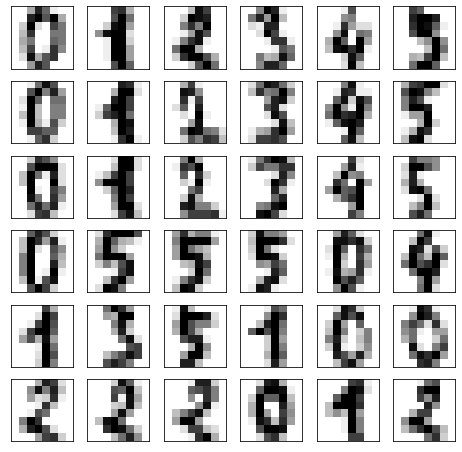

In [4]:
# 手写数字图片
digits = datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
fig, axes = plt.subplots(nrows=6,ncols=6,figsize=(8,8))
for i,ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i],cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [11]:
def plot_embedding(X,y,title=None):
    plt.figure()
    colors = ['#5dbe80','#2d9ed8','#a290c4','#efab40','#eb4e4f','#929591']
    for i in range(6):
        plt.scatter(X[i==y,0],X[i==y,1],c=colors[i],label=i)
    plt.legend()
    plt.title(title)

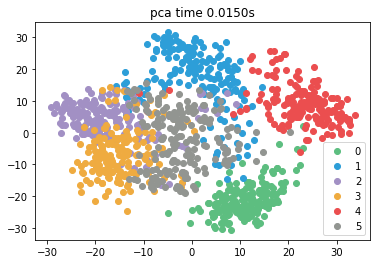

In [12]:
# pca
n_component = 2
t0 = time()
pca = decomposition.PCA(n_components=n_component,random_state=0)
X_pca = pca.fit_transform(X)
plot_embedding(X_pca,y,'pca time %.4fs'%(time()-t0))

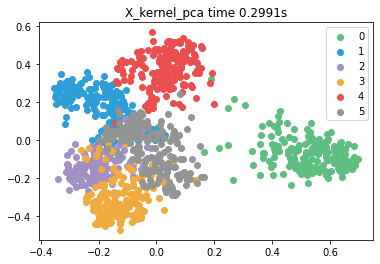

In [9]:
# Kernel pca
n_component = 2
t0 = time()
kernel_pca = decomposition.KernelPCA(
    n_components=n_component,kernel='rbf',gamma=1e-3,fit_inverse_transform=True,alpha=5e-3,random_state=0
)
X_kernel_pca = kernel_pca.fit_transform(X)
plot_embedding(X_kernel_pca,y,'X_kernel_pca time %.4fs'%(time()-t0))

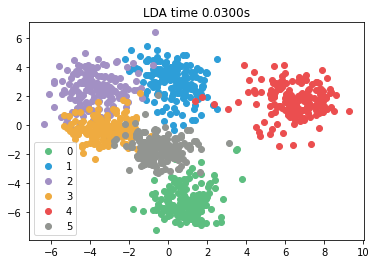

In [8]:
# lda
n_component = 2
t0 = time()
lda = discriminant_analysis.LinearDiscriminantAnalysis(
    n_components=n_component
)
X_lda = lda.fit_transform(X,y)
plot_embedding(X_lda,y,'LDA time %.4fs'%(time()-t0))

## Locally Linear Embeddings LLE 局部线性嵌入

In [ ]:
# LLE
n_component = 2
t0 = time()
lle = manifold.LocallyLinearEmbedding(
    n_components=n_component,n_neighbors=20,method='standard'
)
X_lle = lle.fit_transform(X)
plot_embedding(X_lle,y,'LLE time %.4fs'%(time()-t0))

In [ ]:
# ISOMAP
n_component = 2
t0 = time()
isomap = manifold.Isomap(
    n_components=n_component,n_neighbors=20
)
X_isomap = isomap.fit_transform(X)
plot_embedding(X_isomap,y,'ISOMAP time %.4fs'%(time()-t0))

In [ ]:
# MDS
n_component = 2
t0 = time()
mds = manifold.MDS(
    n_components=n_component,n_init=1,max_iter=100
)
X_mds = mds.fit_transform(X)
plot_embedding(X_mds,y,'MDS time %.4fs'%(time()-t0))

In [ ]:
# t-sne
n_component = 2
t0 = time()
tsne = manifold.TSNE(
    n_components=n_component,init='pca'
)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,y,'TSNE time %.4fs'%(time()-t0))

In [ ]:
def plot_3d(points, points_color, title):
    x,y,z = points.T
    fig, ax = plt.subplots(
        figsize = (6,6),
        facecolor = 'white',
        subplot_kw={"projection":'3d'},# 3 维图
    )
    fig.suptitle(title, size = 16)
    col = ax.scatter(x,y,z,c=points_color,s=50)
    ax.view_init(azim=-60, elev=9)
    fig.colorbar(col, ax=ax, orientation="horizontal")
    plt.show()

def plot_2d(points, points_color, title):
    x, y = points.T
    fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
    fig.suptitle(title, size=16)
    ax.scatter(x, y, c=points_color, s=50)
    plt.show() 

In [ ]:
# s型数据
S_points, S_color = datasets.make_s_curve(1500,random_state=0)

plot_3d(S_points, S_color, "Original S-curve samples") 

In [ ]:
# pca
n_component = 2
t0 = time()
pca = decomposition.PCA(n_components=n_component,ranfom_state=0)
S_pca = pca.fit_transform(S_points)
plot_2d(S_pca,y,'S_pca time %.4fs'%(time()-t0))

In [ ]:
# Kernel pca
n_component = 2
t0 = time()
kernel_pca = decomposition.KernelPCA(
    n_components=n_component,kernel='rbf',gamma=1e-3,fit_inverse_transform=True,alpha=5e-3,random_state=0
)
S_kernel_pca = kernel_pca.fit_transform(S_points)
plot_2d(S_kernel_pca,y,'S_kernel_pca time %.4fs'%(time()-t0))

In [ ]:
# lda 不适用，全部注释
# n_component = 2
# t0 = time()
# lda = discriminant_analysis.LinearDiscriminantAnalysis(
#     n_components=n_component
# )
# S_lda = lda.fit_transform(S_points,S_color)
# plot_2d(S_lda,S_color,'S_LDA time %.4fs'%(time()-t0))

In [ ]:
# LLE
n_component = 2
t0 = time()
lle = manifold.LocallyLinearEmbedding(
    n_components=n_component,n_neighbors=20,method='standard'
)
S_lle = lle.fit_transform(S_points)
plot_2d(S_lle,S_color,'S_LLE time %.4fs'%(time()-t0))

In [ ]:
# ISOMAP
n_component = 2
t0 = time()
isomap = manifold.Isomap(
    n_components=n_component,n_neighbors=20
)
S_isomap = isomap.fit_transform(S_points)
plot_embedding(S_isomap,S_color,'ISOMAP time %.4fs'%(time()-t0))

In [ ]:
# MDS
n_component = 2
t0 = time()
mds = manifold.MDS(
    n_components=n_component,n_init=1,max_iter=100
)
S_mds = mds.fit_transform(S_points)
plot_2d(S_mds,S_color,'S_MDS time %.4fs'%(time()-t0))

In [ ]:
# t-sne
n_component = 2
t0 = time()
tsne = manifold.TSNE(
    n_components=n_component,init='pca'
)
S_tsne = tsne.fit_transform(S_points)
plot_2d(S_tsne,S_color,'S_TSNE time %.4fs'%(time()-t0))